In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture

iris = load_iris()

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [154]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [155]:
df_match = df.copy()
df_match['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [156]:
df_match.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


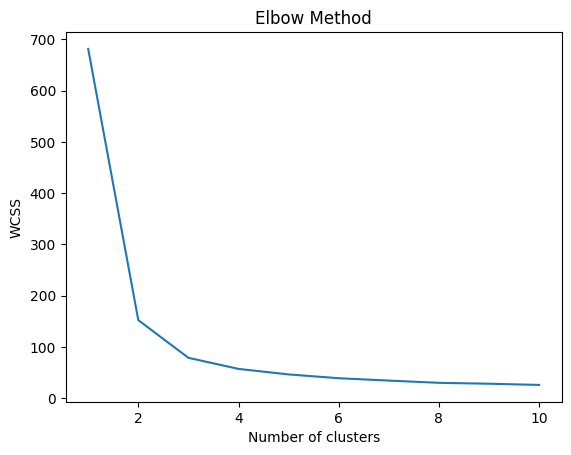

In [158]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [159]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(df)

df['Cluster'] = y_kmeans

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [160]:
df['Cluster'].value_counts()

Cluster
0    62
1    50
2    38
Name: count, dtype: int64

In [161]:
def visualizeCluster(df, title='None'):
    fig = plt.figure(figsize=(20, 10))

    ax1 = fig.add_subplot(121)
    ax1.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c='black')
    ax1.set_xlabel('sepal length (cm)')
    ax1.set_ylabel('sepal width (cm)')
    ax1.set_title('Unclustered')

    ax2 = fig.add_subplot(122, projection='3d', box_aspect=(1, 1, 1))
    ax2.set_box_aspect(None, zoom=0.85)

    ax2.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], c=df['Cluster'], s=50)
    ax2.set_xlabel('sepal length (cm)')
    ax2.set_ylabel('sepal width (cm)')
    ax2.set_zlabel('petal length (cm)')
    ax2.set_title('Clustered ('+title+')')

    plt.show()
    return

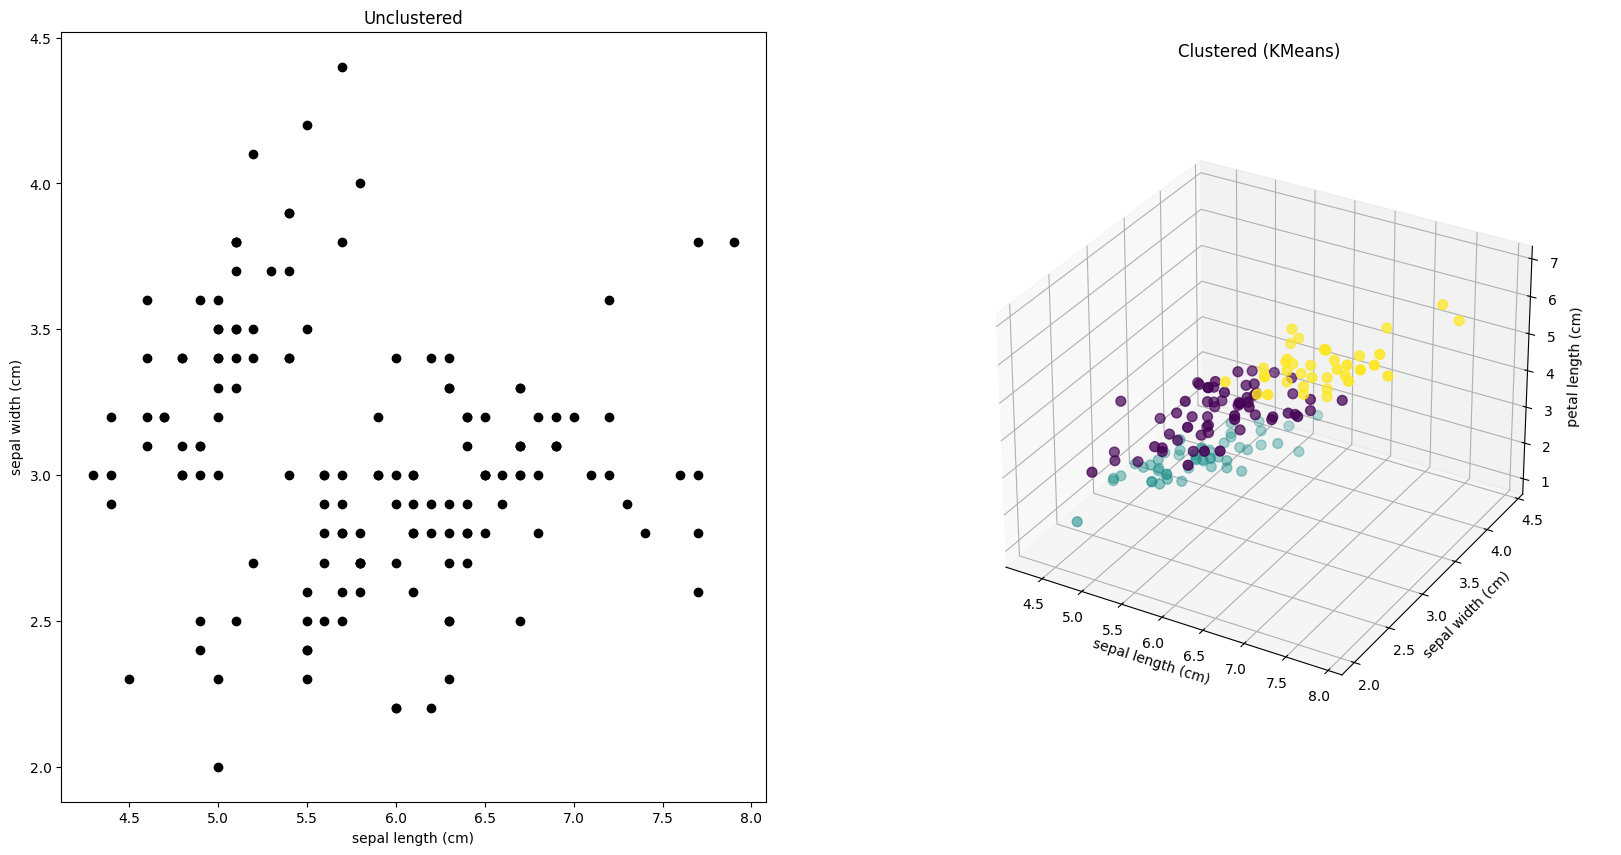

In [162]:
visualizeCluster(df, title='KMeans')

In [163]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

y_dbscan = dbscan.fit_predict(df)

df['Cluster'] = y_dbscan

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [164]:
df['Cluster'].value_counts()

Cluster
 1    55
 0    49
 2    28
-1    18
Name: count, dtype: int64

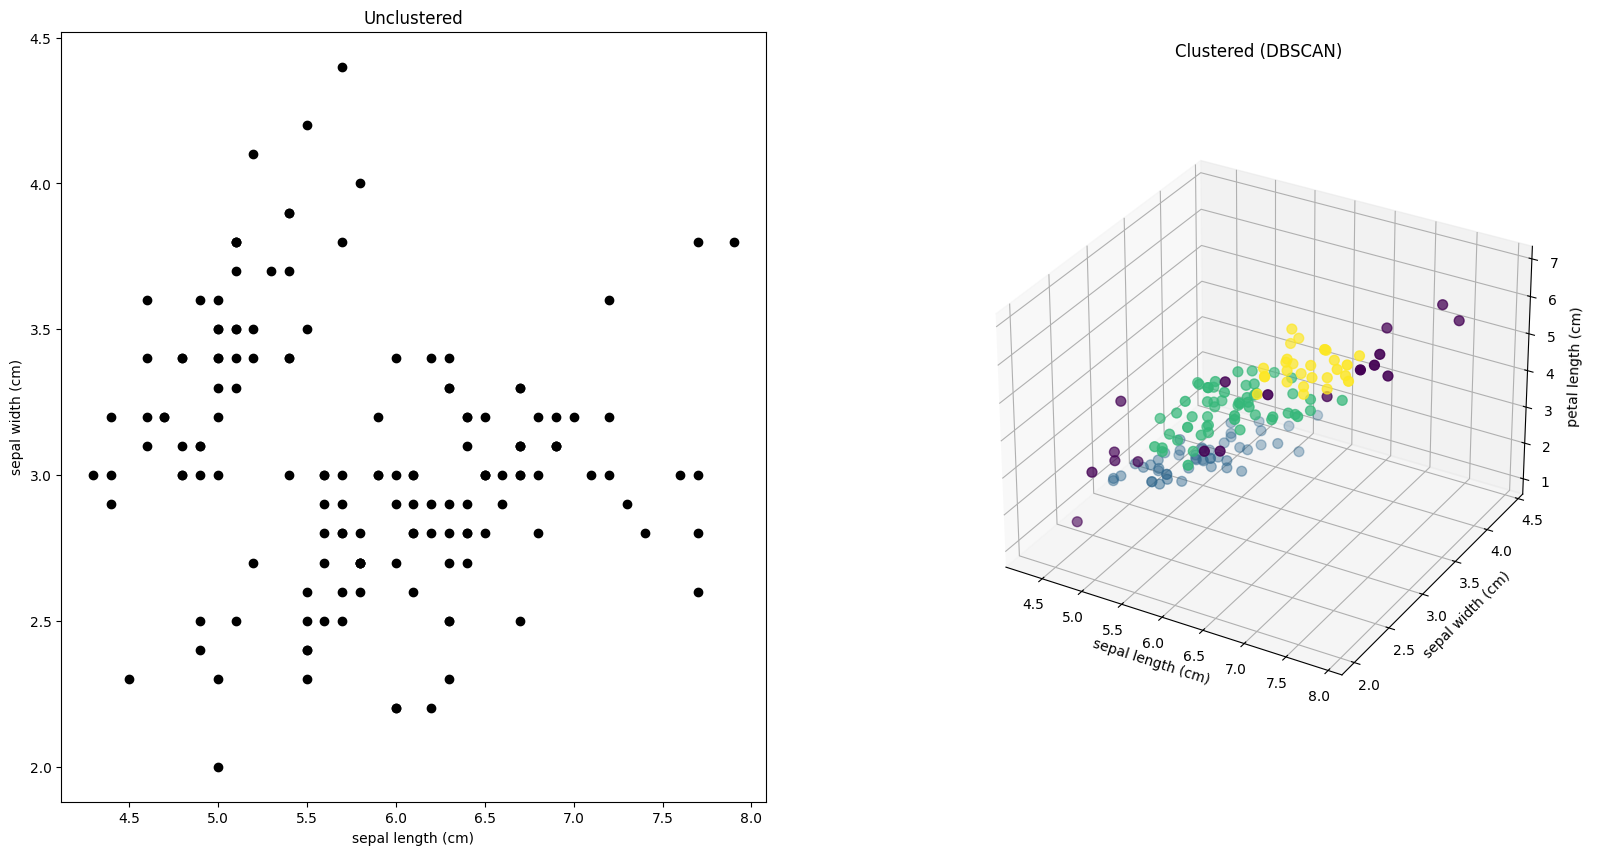

In [165]:
visualizeCluster(df, title='DBSCAN')

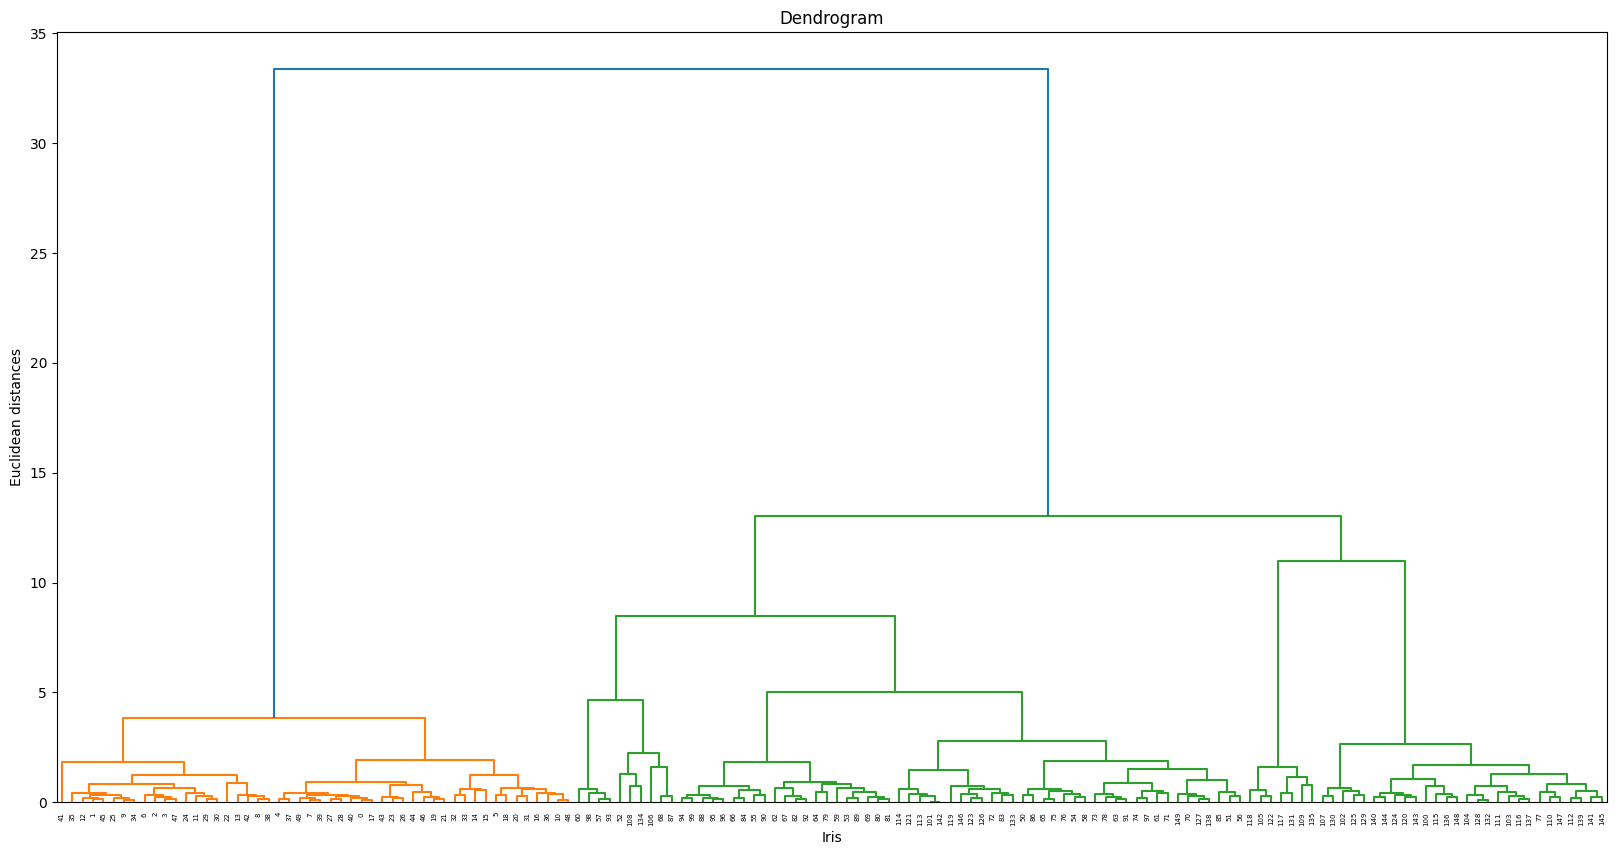

In [166]:
fig = plt.figure(figsize=(20, 10))

dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()

In [167]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

y_hc = hc.fit_predict(df)

df['Cluster'] = y_hc

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [168]:
df['Cluster'].value_counts()

Cluster
2    65
1    50
0    35
Name: count, dtype: int64

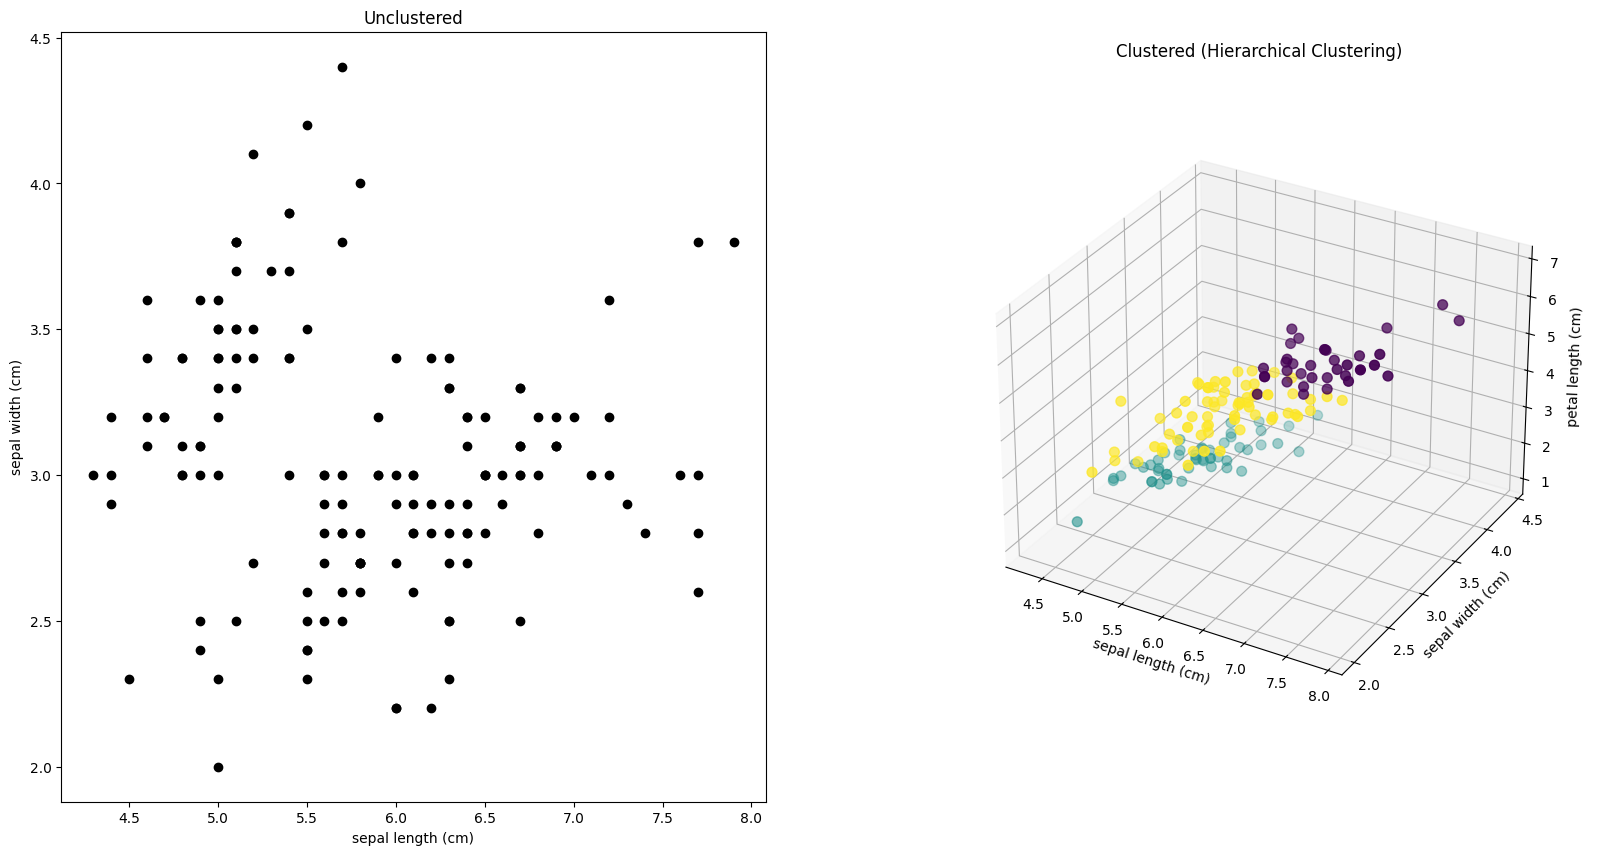

In [169]:
visualizeCluster(df, title='Hierarchical Clustering')

In [170]:
gmm = GaussianMixture(n_components=3)

y_gmm = gmm.fit_predict(df)

df['Cluster'] = y_gmm

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [171]:
df['Cluster'].value_counts()

Cluster
1    65
0    50
2    35
Name: count, dtype: int64

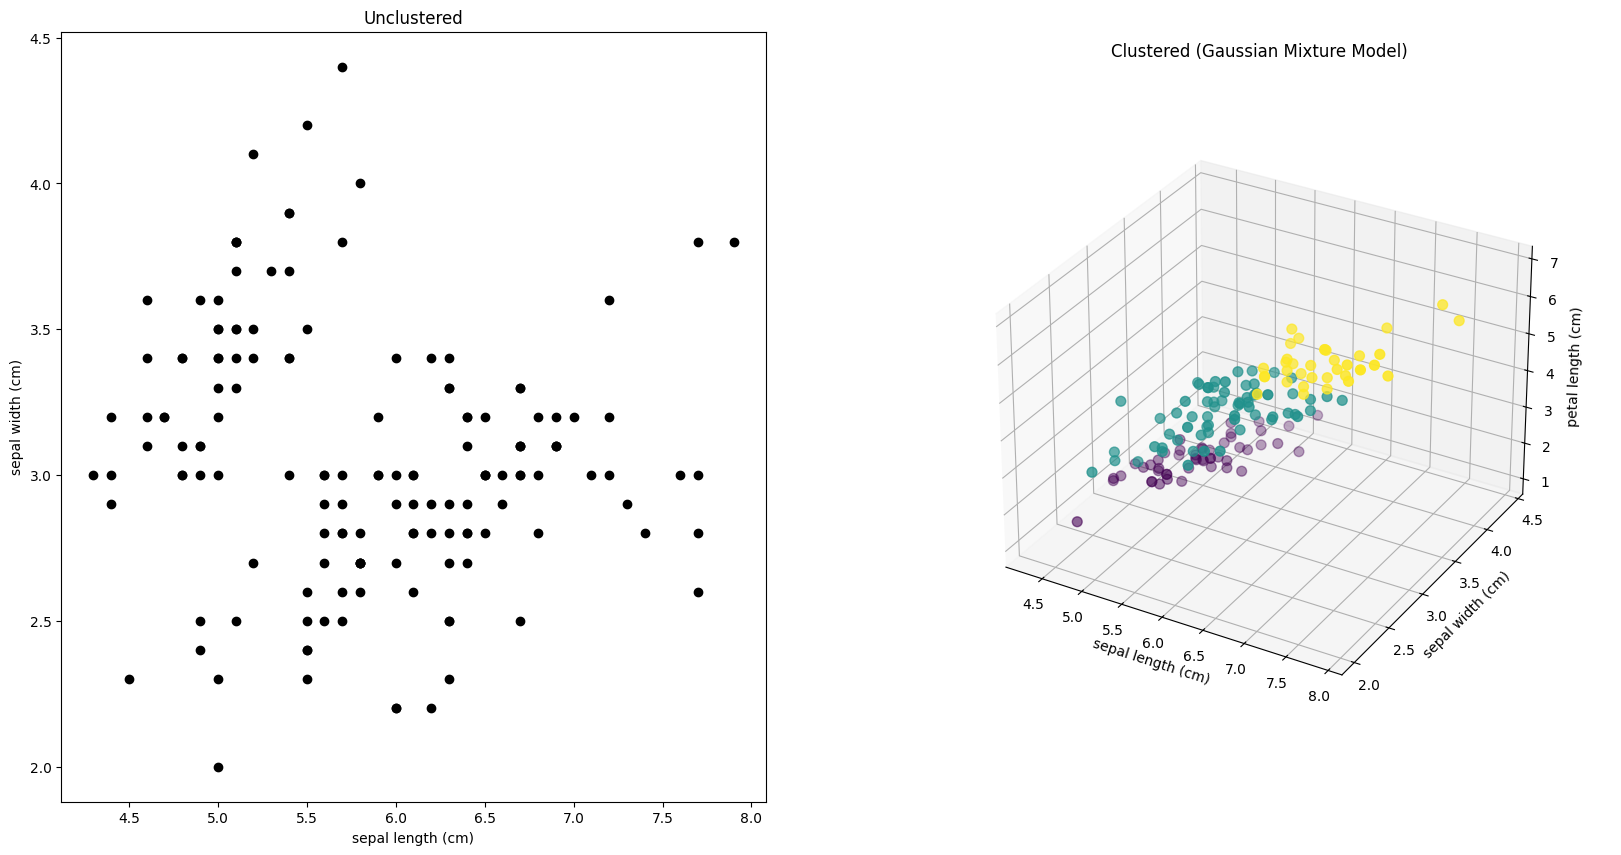

In [172]:
visualizeCluster(df, title='Gaussian Mixture Model')

In [173]:
for method in ['kmeans', 'dbscan', 'hc', 'gmm']:
    if method == 'kmeans':
        kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
        y_kmeans = kmeans.fit_predict(df)
        df_match['Cluster'] = y_kmeans
    elif method == 'dbscan':
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        y_dbscan = dbscan.fit_predict(df)
        df_match['Cluster'] = y_dbscan
    elif method == 'hc':
        hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
        y_hc = hc.fit_predict(df)
        df_match['Cluster'] = y_hc
    elif method == 'gmm':
        gmm = GaussianMixture(n_components=3)
        y_gmm = gmm.fit_predict(df)
        df_match['Cluster'] = y_gmm

    df_match['Cluster'] = df_match['Cluster'].map(df_match.groupby('Cluster')['species'].agg(lambda x: x.value_counts().index[0]))

    df_match['Match'] = df_match['species'] == df_match['Cluster']
    print(method)
    print(df_match['Match'].value_counts())
    print('')

kmeans
Match
True     134
False     16
Name: count, dtype: int64

dbscan
Match
True     129
False     21
Name: count, dtype: int64

hc
Match
True     133
False     17
Name: count, dtype: int64

gmm
Match
True     133
False     17
Name: count, dtype: int64

